

# **Lab 8**
# CS 391 E1: Foundations of Data Science, Spring 2021
### Dr. Dora Erdos (Instructor), Hannah Catabia (Teaching Fellow)

**This lab is based on:**
https://towardsdatascience.com/optimization-of-supervised-learning-loss-function-under-the-hood-df1791391c82

In [2]:
import pandas as pd
import numpy as np
from numpy.linalg import svd, norm
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

ames = pd.read_csv('https://raw.githubusercontent.com/catabia/cs391_spring21/main/AmesHousing.csv')
ames = ames[['Neighborhood','Lot Area', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'SalePrice']]
ames.columns = ['neighborhood','lot_area', 'overall_cond', 'year_built', 'year_remod', 'sqft', 'full_bath', 'half_bath', 'bedroom', 'total_rooms', 'sale_price']
ames=ames.dropna()
ames.describe()

,lot_area,overall_cond,year_built,year_remod,sqft,full_bath,half_bath,bedroom,total_rooms,sale_price
count,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00
mean,10147.92,5.56,1971.36,1984.27,1499.69,1.57,0.38,2.85,6.44,180796.06
std,7880.02,1.11,30.25,20.86,505.51,0.55,0.50,0.83,1.57,79886.69
min,1300.00,1.00,1872.00,1950.00,334.00,0.00,0.00,0.00,2.00,12789.00
25%,7440.25,5.00,1954.00,1965.00,1126.00,1.00,0.00,2.00,5.00,129500.00
50%,9436.50,5.00,1973.00,1993.00,1442.00,2.00,0.00,3.00,6.00,160000.00
75%,11555.25,6.00,2001.00,2004.00,1742.75,2.00,1.00,3.00,7.00,213500.00
max,215245.00,9.00,2010.00,2010.00,5642.00,4.00,2.00,8.00,15.00,755000.00


In [3]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

X = scaler.fit_transform(ames.drop(['neighborhood', 'sale_price'], axis=1))
y = scaler.fit_transform(ames.sale_price.values.reshape(ames.shape[0], 1))

# add a column of 1s so we can estimte the intercept
X = np.c_[np.ones(X.shape[0]), X]
#print(X)

# number of samples
m = X.shape[0]

# initialize weights to 1
theta = np.ones((X.shape[1], 1))
theta


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [4]:
# Instantiate a hypothesis

hypothesis = X@theta - y


# Calculate cost function
def cost(theta, X=X, y=y, m=m):
    cost = np.transpose((X@theta - y))@(X@theta - y)
    cost = (1/(2*m))*cost
    return cost
    
# Calculate derivative of cost function
def cost_dev(j, theta, X=X, y=y, m=m):
    dev = X[:, j]@(X@theta - y)
    dev = (1/m)*dev
    return dev

In [5]:
# Assign a learning rate
a = .01
cost_list = []
theta_temp = np.zeros(theta.shape)
theta_list = []
for i in range(100):
    
    for j in range(len(theta)):
        theta_temp[j] = theta[j] - a*cost_dev(j, theta)
    
    theta = theta_temp        
    
    theta_list.append(list(theta))
    cost_val = float(cost(theta))
    cost_list.append(cost_val)

Text(0, 0.5, 'MSE')

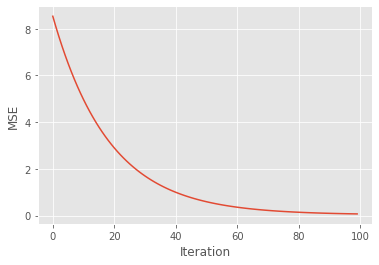

In [7]:
sns.lineplot(x=np.arange(len(cost_list)), y = cost_list)
plt.xlabel('Iteration')
plt.ylabel('MSE')

In [8]:
cost_list[-1]

0.06870452289252157

In [9]:
# Stochastic Gradient Descent for linear regression using SciKit Learn

from sklearn.linear_model import SGDRegressor

model = SGDRegressor(alpha = 0.01, max_iter = 100)
y=y.reshape(y.shape[0],)
model.fit(X, y)


mse = ((model.predict(X) - y)**2).mean()
mse


0.005756184088985424